# Visualization and postprocessing of results

In [57]:
import csv
import re
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

The results are samples, stored in a CSV file.

In [58]:
RESULTS="results.csv"

In [59]:
header = None
with open(RESULTS) as f:
    header = next(csv.reader(f))
data = numpy.genfromtxt(RESULTS, delimiter=',', skip_header=True)

Posterior distributions of expected time of arrival for each company, overlayed.

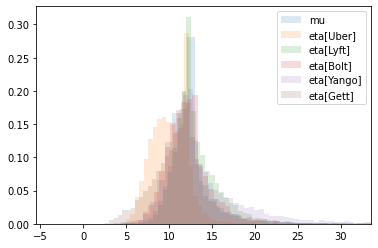

In [60]:
xmin = data.max()
xmax = data.min()
for i in range(len(header)):
    if header[i] != 'tau': # tau does not have an easy to interpret meaning here
        mu = data[:, i].mean()
        sigma = data[:, i].std()
        if mu - 3*sigma < xmin:
            xmin = mu - 3*sigma
        if mu + 3*sigma > xmax:
            xmax = mu + 3*sigma
        plt.hist(data[:, i],
                 alpha=1/(data.shape[1]-1), label=header[i],
                 density=True, bins=data.shape[0]//20)
plt.xlim(xmin, xmax)
plt.legend()
plt.show()

Means and 90% confidence intervals.

In [61]:
print("company,mean,5%,95%")
i5 = len(data)*5//100
i95 = len(data)*95//100
for i in range(len(header)):
    if header[i].startswith("eta"):
        samples = numpy.sort(data[:, i])
        company = re.match(r"eta\[(.*)\]", header[i]).group(1)
        print(f"{company},{samples[i5]:.2f},{samples[i95]:.2f}")

company,mean,5%,95%
Uber,6.83,13.19
Lyft,9.71,18.47
Bolt,8.60,17.09
Yango,9.46,24.81
Gett,6.10,18.29
